In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Shoes_Data.csv')
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


In [4]:
len(df)

1230

1. ЗАДАЧА РЕГРЕССИИ - ПРЕДСКАЗАНИЕ ЦЕНЫ

In [5]:
df_1 = df[['price', 'product_description']]

In [6]:
df_1.head()

,price,product_description
0,₹279.00,Elevate your style with this classy pair of Ru...
1,₹479.00,The product will be an excellent pick for you....
2,₹430.00,Flaunt with these stylish and unique red casua...
3,₹499.00,Robbie Jones Shoes Are Designed To Keeping In ...
4,₹499.00,Sparx is a spectacular range of footwear from ...


Сделаем нужные переменные числовыми.

In [7]:
def price_to_float(price):
    return float(price[1:-3])
    

df_1['price'] = df_1['price'].apply(price_to_float)


/Users/Jeka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
df_1.head()

,price,product_description
0,279.0,Elevate your style with this classy pair of Ru...
1,479.0,The product will be an excellent pick for you....
2,430.0,Flaunt with these stylish and unique red casua...
3,499.0,Robbie Jones Shoes Are Designed To Keeping In ...
4,499.0,Sparx is a spectacular range of footwear from ...


Посмотрим на данные. Для начала посмотрим, нет ли у нас пустых описаний. Посмотрим на длину текста

In [9]:
df_1['description_length'] = df_1.product_description.map(len)

/Users/Jeka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_1.head()

,price,product_description,description_length
0,279.0,Elevate your style with this classy pair of Ru...,222
1,479.0,The product will be an excellent pick for you....,78
2,430.0,Flaunt with these stylish and unique red casua...,398
3,499.0,Robbie Jones Shoes Are Designed To Keeping In ...,576
4,499.0,Sparx is a spectacular range of footwear from ...,1030


In [11]:
sorted(df_1.description_length.values)[:10]

[1, 1, 1, 6, 10, 17, 18, 24, 25, 25]

Имеются некоторые пустые описания, удалим их.

In [12]:
df_1 = df_1.drop(df_1[df_1.description_length == 1].index)

Теперь посмотрим, какие символы вообще встречаются в отзывах.

In [13]:
all_texts = ''
for descr in df_1.product_description.values:
    all_texts += descr

all_symbols = ''.join(set(all_texts))
all_symbols

'😎GಯSഓ്டരLು–Vேறளöಜ*ಠതxಥరുघటഥकഘदಅஷமbംో%इറഊಂజाषச2ెृೀ்ுल»✦ಫಶ?KaPஒಡെஓీனനय6ிओಞீंNചtൺభಇൂsసWకയౌTஇपऔಟcഒహఎణపണഫy1ൻథബzాೆோை्िQೋఆdఫಏೊ\u200d👉R్ంचவొങńAஎేഭFतಸഖಘuఅైIబजईऑయसಪ.«ैfH’ोിஞர़ாkూஃನఒೌచஉൽക ❓లಐമुಚीढళ0தrൈg\x96—വj~ാഷX!ண\'ತअDஸലഉఛनಬभ_ഈऊछഅटೈഎಛమ®డY°+ॉಣർरधರుಈಗൃग-ஆಿవ3ಮ5ഗಹ&್MఈേழఘളणದலಧಒEpീన•oबൗೇeफిJఇநயC`പडഏೃnವ=ೂ:थಖZൾഡధആउ●ಆआృB9பಎ🏻സूదUശwಭएेகഞൊ48Oഔqखஜతധஹಕജ™vఓூഹhहಉlశോெ7mషಾദொशಲಓஅಷ‘ఉमടiஏഇங("/గഴवಳ)ठ'

Видно, что встречаются тексты на других языка. Посмотрим, сколько их.

In [14]:
#!pip install langdetect

In [15]:
from langdetect import detect

df_1['language'] = df_1.product_description.map(detect)

In [16]:
df_1.language.value_counts()

en    1174
ml      18
ta      13
de       6
af       4
te       3
no       3
kn       2
tl       2
fr       1
it       1
Name: language, dtype: int64

Преимущественно все описания представлены на английском, текстов на других языках значительно меньше. Так как мы собираемся их векторизовать, то целесообразнее просто оставить только тексты на англиском, а остальные удалить. Да и делать какие-то модели для текстов на разных языках тоже как-то бессмысленно.

In [17]:
df_1 = df_1.drop(df_1[df_1.language != 'en'].index)

Посмотрим, имеются ли повторяющиеся описания. Возможно, имело место какое-то автозаполнение или что-то подобное.

In [18]:
df_1['product_description'].value_counts()[:5]

The product will be an excellent pick for you. It ensures an easy maintenance.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             29
Flavia shoes are a perfect blend of elegance & style classy & fabulous breaking the stereotype of geeky & 

Повторяющиеся описания действительно имеются, но они не похожи на автозаполнение, поэтому удалим все дублированные описания, сохранив одно со средней ценой

In [19]:
dupl_texts = df_1['product_description'].value_counts().loc[lambda x : x > 1].index.tolist()

for text in dupl_texts:
    df_1.price[df_1['product_description'] == text] = df_1[df_1['product_description'] == text].price.mean()

/Users/Jeka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
df_1 = df_1.drop_duplicates(subset=['product_description'])

In [21]:
df_1.isnull().sum()

price                  0
product_description    0
description_length     0
language               0
dtype: int64

Теперь, когда все лишнее на первый взгляд убрано, посмотрим на распределение цен

In [22]:
df_1.describe()

,price,description_length
count,699.000000,699.000000
mean,1878.960468,431.821173
std,1606.129072,409.893041
min,127.000000,18.000000
25%,559.500000,205.500000
50%,1507.000000,289.000000
75%,2579.000000,534.500000
max,7992.000000,3157.000000


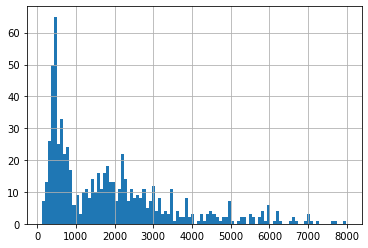

In [23]:
df_1.price.hist(bins=100)

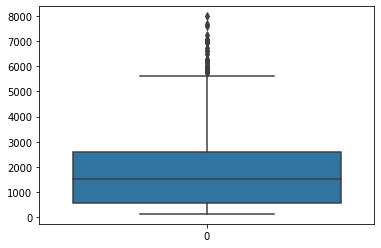

In [24]:
ax = sns.boxplot(data=df_1['price'])

Цены находятся в пределах от 127 до почти 8000 фунтов. Однако по большей части она распределена в районе 500-800 фунтов. Имеются выбросы, экстремальных немного, незначительных довольно много. Но я решила с этим ничего не делать, так как выборка уже сильно сократилась

Возьмем длину описания как переменную.

Посмотрим на распределение длин, а также на то, имеется ли какая-нибудь зависимость между ценой и длиной описания

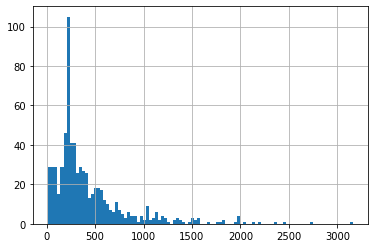

In [25]:
df_1.description_length.hist(bins=100)

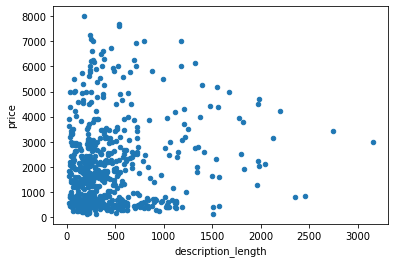

In [26]:
df_1.plot.scatter('description_length', 'price')

In [27]:
df_1.corr()

,price,description_length
price,1.000000,0.129954
description_length,0.129954,1.000000


Длина описания в большинстве случаев в пределах 1000 символов, с ценой товара особой корреляции нет, поэтому смысла ее использовать как фичу нет

Перейдем к препроцессингу.

В рамках препроцессинга я хочу избавиться от мусора - цифр, эмодзи, пунктуации. Эмодзи встречаются слишком редко и вряд ли что-то значат, а наличие цифр и пунткуации не несет никакой инфы. Также я удалю стоп-слова, так как мы векторизуем мешком слов, а в таком случае мы никак не учитываем структуру и синтаксис предложения, для чего иногда различные частицы оказываются важными; в ином же случае они только захламляют данные при векторизации. Также токены я лемматизирую, чтобы немного сократить количество признаков - мы не хотим различать формы одного и того же слова при векторизации ; стемминг делать не буду, так как это кажется излишним. А, еще все привести к нижнему регистру в самом начале.

In [28]:
from string import punctuation

import nltk
#nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

word_list = nltk.word_tokenize('im doing great.')

def remove_punct(text):
    return ' '.join(token.strip('\\,.\'!?-:;\")(1234567890').lower() \
              for token in text.split())

def tokenize(text):
    return nltk.word_tokenize(text)


def remove_musor(tokens): 
    return ' '.join(token for token in tokens if token.isalpha() and token not in stopwords)


def lemmatize(text):
    return ''.join(lemmatizer.lemmatize(w) for w in text)



def clean(text):
    text = remove_punct(text)
    text = tokenize(text)
    text = remove_musor(text)
    text = lemmatize(text)
    return text

In [29]:
df_1.product_description = df_1.product_description.apply(clean)

In [31]:
df_1.head()

,price,product_description,description_length,language
0,389.000000,elevate style classy pair running shoe house c...,222,en
1,792.241379,product excellent pick ensures easy maintenance,78,en
2,401.800000,flaunt stylish unique red casual shoes per lat...,398,en
3,499.000000,robbie jones shoes designed keeping mind durab...,576,en
4,499.000000,sparx spectacular range footwear house relaxo ...,1030,en


Далее переходим к регрессионным моделям, будем проверять линейню модель с l1 и l2 регуляризацией, а также sgd регрессор. Будем подбирать к ним гиперпараметры, а затем сравним качество между лучшими моделями. Начнем с векторизации tfidf

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfifdfvectorizer = TfidfVectorizer()
X_tfidf = tfifdfvectorizer.fit_transform(df_1.product_description)
y_tfidf = df_1.price

Далее разобьем выборку на трэин и тест

In [33]:
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import GridSearchCV

models = [LinearRegression(), SGDRegressor(), Ridge(), Lasso()]


param_grid = [{
    'fit_intercept': [True, False],  #linear regression
},
    {
    'max_iter': [500, 1000, 1500, 2000],   #sgd
    'alpha': 10.0 ** -np.arange(1, 7),
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}, 
    {   
    'max_iter': [500, 1000, 1500, 2000],   #ridge
    'alpha': [0.1, 0.5, 1, 2, 5],
}, 
    {
    'max_iter': [500, 1000, 1500, 2000],
    'alpha': [0.1, 0.5, 1, 2, 5],
}]

In [35]:
best_models_tfidf = [] 

for i in range(len(models)):
    grid_search = GridSearchCV(models[i], param_grid[i])
    grid_search.fit(X_train_tfidf, y_train_tfidf)
    best_models_tfidf.append(grid_search.best_estimator_)

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

In [36]:
for model in best_models_tfidf:
    preds = model.predict(X_test_tfidf)
    print(mean_absolute_error(y_test_tfidf, preds))

1174.7920511650234
847.8268773207617
866.3962233004493
837.7999069256249


Итого лассо показало лучшее качество

In [37]:
best_model = best_models_tfidf[3]

Сделаем то же самое для count_vectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_cv = CountVectorizer()
X_cv = vectorizer_cv.fit_transform(df_1.product_description)
y_cv = df_1.price

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, random_state=42)

In [39]:
best_models_cv = [] 

for i in range(len(models)):
    grid_search = GridSearchCV(models[i], param_grid[i])
    grid_search.fit(X_train_cv, y_train_cv)
    best_models_cv.append(grid_search.best_estimator_)

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6151310.072243319, tolerance: 109764.07275428405
  max_iter, tol, rng, random, positive)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4940464.5049816985, tolerance: 112144.29528598337
  max_iter, tol, rng, random, positive)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6409907.39331278, tolerance: 106250.1953164635
  max_iter, tol, rng, random, positive)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:4

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291742.23043068126, tolerance: 109138.00714120691
  max_iter, tol, rng, random, positive)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549628.9605869912, tolerance: 113778.8322605562
  max_iter, tol, rng, random, positive)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258892.34161873162, tolerance: 109764.07275428405
  max_iter, tol, rng, random, positive)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py

In [40]:
for model in best_models_cv:
    preds = model.predict(X_test_cv)
    print(mean_absolute_error(y_test_cv, preds))

1783.50059570909
942.5691473435868
923.7634717623694
906.2145423096082


С такой векторизацией лучший результат тоже показало лассо, но качеству заметно хуже.

Итого у нас лучшая модель с л1 регуляризацией и векторизацией тфидф. В целом, я ожидала, что с тфидф получится лучше, опираясь на предыдущий опыт, таким образом, нам сохранить чуть больше информации, чем просто частота встречаемости слов. 
Что касается модели, было вполне ожидаемо, что у моделей с регуляризацией результат будет лучше, простая линейная регрессия оверфиттится под трэин данные. То, что лассо работает лучше ридж регрессии, можно попробовать объяснить тем, что у нас много признаков, очень часто ненужных, а лассо помогает отобрать и использовать самые важные из них, а остальные занулить. Sgd может работать чуть хуже из-за того, что у нас достаточно много как бы выбросов, и разрыв между ценами большой, градиент может взрываться или наоборот шагать слишком медленно (но это я просто гадаю, хз на самом деле) 

In [41]:
preds = best_model.predict(X_test_tfidf)

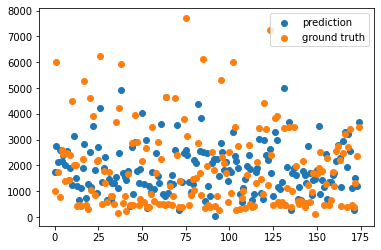

In [81]:
pred_plot = plt.scatter([i for i in range(len(preds))], preds)
truth_plot = plt.scatter( [i for i in range(len(preds))], y_test_tfidf)

plt.legend((pred_plot, truth_plot), ('prediction', 'ground truth') )

plt.show()

Это очень тупая визуализация, но что-то по ней все-таки видно. Во-первых, видно, что достаточно часто предсказываются значения сильно больше вообще встречающихся в тестовой выборке. Во-вторых, большая часть предсказаний находится на нижней границе, в то в время как реальные цены чуть более распределены. То есть если цена чуть выше средней, то велика вероятность, что наша модель ошибется, сильно завысив цену. В случае же, если реальная цена средняя и ниже, он очень часто предскажет нижнюю границу. В целом,  это можно объяснить тем, как распределена сама выборка: большая часть в районе 1000, однако есть немало выбросов 3000+. Он не особо хорошо умеет отличать эти выбросы между собой, поэтому часто ошибается с большими ценами (хотя чаще всего и может их выделить от дешевых продуктов). Продукты средней или ниже цены он тоже плохо разделяет между собой, чаще просто предсказывает цену меньше. В общем, отличает дорогие от недорогих, но внутри самих этих групп плох (возможно, из-за недостаточной выборки)

2. КЛАССИФИКАЦИЯ ПО ОТЗЫВУ

In [200]:
reviews = []
ratings = []
for i in range(len(df)):
    reviews.extend(df.loc[i]['reviews'].split('||'))
    ratings.extend(df.loc[i]['reviews_rating'].split('||'))

In [201]:
df_2 = pd.DataFrame({'review': reviews, 'rating': ratings})

In [202]:
df_2.head()

,review,rating
0,Not happy with product,1.0 out of 5 stars
1,It's not as expected.,1.0 out of 5 stars
2,AVERAGE PRODUCT,3.0 out of 5 stars
3,Pic more beautiful,3.0 out of 5 stars
4,Got damage product. But quality is average fo...,3.0 out of 5 stars


Сделаем нормальные метки классов

In [203]:
def rating_to_int(rating):
    return int(rating.strip(' ')[0])


df_2['rating'] = df_2['rating'].apply(rating_to_int)


In [204]:
df_2.head()

,review,rating
0,Not happy with product,1
1,It's not as expected.,1
2,AVERAGE PRODUCT,3
3,Pic more beautiful,3
4,Got damage product. But quality is average fo...,3


Посмотрим на данные

In [205]:
df_2.isnull().sum() #пропусков нет

review    0
rating    0
dtype: int64

Для начала сделаем все то же самое: определим, есть ли пустые отзывы, посмотрим, на каких языках они написаны, и проверим наличие дубликатов

In [206]:
df_2['review_length'] = df_2.review.map(len)
sorted(df_2['review_length'].values[:10])

[10, 14, 16, 19, 21, 22, 22, 43, 52, 60]

Далее посмотрим языки

In [207]:
all_texts = ''
for descr in df_2.review.values:
    all_texts += descr

all_symbols = ''.join(set(all_texts))
all_symbols  #есть какой-то отстой, надо чистить

'🥰g😎…N😂GJS🏃t😄💪j🌟👞🙂C☑ட👇🖤s✌LडX!W😍💖😠💥n\'💚Tअप😔c💸D=❤|:😭V🤑Zन💯y😟1_उ🏼ளz*♂आछx☺्टBिQ👏।9பd😐☹🏻😉😡😢\u200d😁Y₹ूक😒U🦶👎🇪R+दॉ✊w😀😘b🥾च😤ेरA🌹4%8O😞q🇮खFतइ🤟😃⇢🙄😌u😶⭐ाI🤙2ज🔥ई🤣vग-स்झhहுल».l😋«3💰ैf🤮@5H’😅7ो🤨)❌?🇳&MK👟️#ak😑mP🤘 🇨❣\U0001f90eEमpi📦ुय6ी🤫oிढ(ब"0/e👌🤩ं💕वத😇✔rß💋👍😊'

In [208]:
def detect_cached(t):
    try:
        return detect(t)
    except:
        return 'unkn'

In [209]:
df_2['language'] = df_2.review.map(detect_cached)
df_2['language'].value_counts()

en      6171
de       914
so       435
ro       365
af       344
ca       316
no       154
fr       147
id       120
it        99
tl        88
da        85
pl        74
nl        71
cy        70
unkn      61
et        52
es        46
sl        43
sw        42
tr        39
pt        36
hr        23
sv        23
fi        20
sq        20
hu        20
cs        19
sk        17
vi        17
hi        11
lv         8
mr         4
lt         3
ta         1
Name: language, dtype: int64

Оставим только английские тексты


In [210]:
df_2 = df_2.drop(df_2[df_2.language != 'en'].index)

Теперь посмотрим дубликаты

In [211]:
df_2['review'].value_counts().index.tolist()

[' Report abuse',
 ' Good product',
 ' Nice shoes',
 ' Good quality',
 ' Quality',
 ' Good one',
 ' Very comfortable',
 ' Go for it',
 'Report abuse',
 ' Perfect',
 ' Must buy',
 ' Satisfied',
 ' Comfortable',
 ' Comfortable shoes',
 ' Nice shoe',
 ' Very good product',
 ' Not comfortable',
 ' Waste of money',
 ' Great',
 ' Verified Purchase',
 ' Not recommended',
 ' Fake product',
 ' Comfort',
 ' Worth buying',
 ' Very good product.',
 ' Worst product',
 ' Good Product',
 ' Good quality product',
 'Good product',
 ' good product',
 ' Light weight',
 ' Five Stars',
 ' Worth every penny',
 ' Great buy',
 ' very happy with my purchase',
 ' Comfortable Shoes at Affordable price',
 ' Smart light value for money',
 ' Order a size larger than your usual',
 ' Good product.',
 ' Worth the money',
 ' Comfortable Walk.. Awesome product',
 ' Nice one',
 ' Very Comfortable',
 ' Low quality',
 ' Amazing product',
 ' Worth it',
 ' Awesome product',
 'Not comfortable',
 ' Awesome Quality',
 ' Loved i

Выделяется некоторое количество отзывов 'report abuse' и 'verified purchase', которые выглядят как просто автозаполнения, удалим такие

In [220]:
df_2 = df_2.drop(df_2[df_2.review == ' Report abuse'].index)
df_2 = df_2.drop(df_2[df_2.review == 'Report abuse'].index)
df_2 = df_2.drop(df_2[df_2.review == ' Verified Purchase'].index)

Теперь поанализируем данные

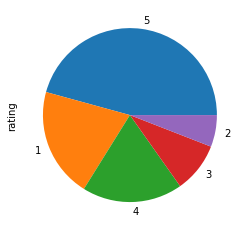

In [221]:
df_2.rating.value_counts().plot(kind='pie');

Метки классов разделены не очень равномерно
Рассмотрим некоторые характеристики по классам, начнем с длины отзыва.

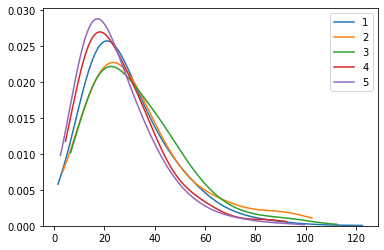

In [222]:
for i in [1,2,3,4,5]:
    sns.kdeplot(df_2.review_length[df_2.rating == i], bw=0.5, label=i)

В целом, по длине отзывы классов распределены примерно одинаково между собой

Попробуем найти какие-то лексические особенности отзывов разных классов. Сделаем для этого препроцессинг, он будет таким же, как и в предыдущей задаче.

In [223]:
df_2.review = df_2.review.apply(clean)

In [224]:
from wordcloud import WordCloud

text = ' '.join(df_2.review)

wordcloud_all = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

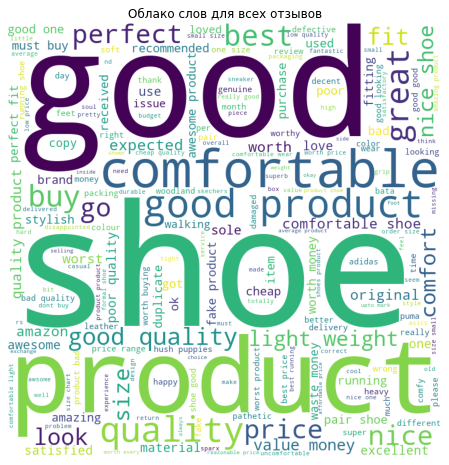

In [225]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_all)
plt.axis("off") 
plt.title('Облако слов для всех отзывов')
plt.show()

В целом, видна в основном позитивно и негативно окрашенная лексика. Сделаем облако слов для каждого класса.

In [226]:
def word_cloud(df, label):
    text = ' '.join(df_2.review[df_2.rating == label])

    wordcloud = WordCloud(
        background_color ='white',
        width = 800,
        height = 800, 
    ).generate(text)
    return wordcloud



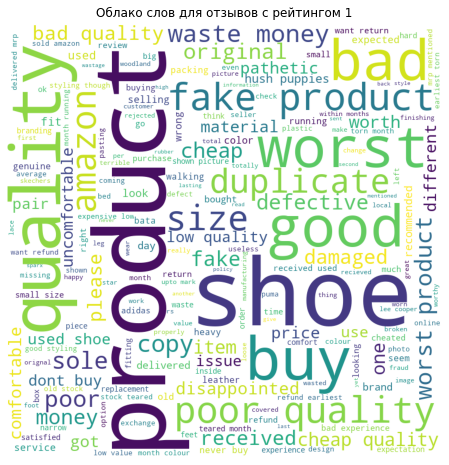

In [227]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud(df_2, 1))
plt.axis("off") 
plt.title('Облако слов для отзывов с рейтингом 1')
plt.show()

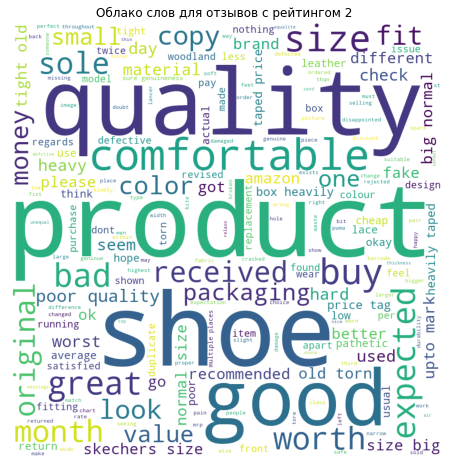

In [228]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud(df_2, 2))
plt.axis("off") 
plt.title('Облако слов для отзывов с рейтингом 2')
plt.show()

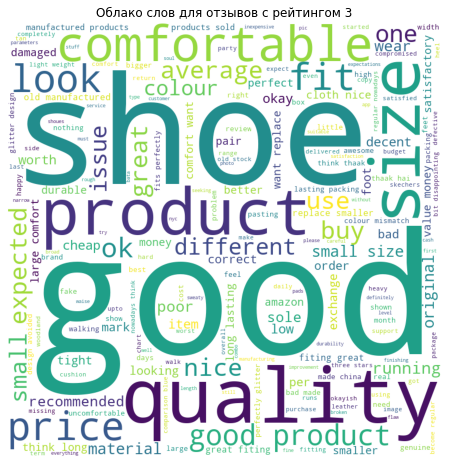

In [229]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud(df_2, 3))
plt.axis("off") 
plt.title('Облако слов для отзывов с рейтингом 3')
plt.show()

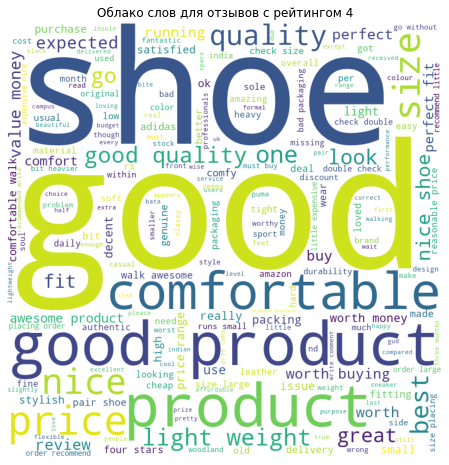

In [230]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud(df_2, 4))
plt.axis("off") 
plt.title('Облако слов для отзывов с рейтингом 4')
plt.show()

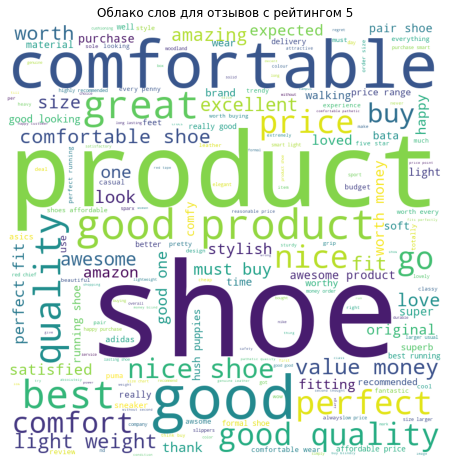

In [231]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(word_cloud(df_2, 5))
plt.axis("off") 
plt.title('Облако слов для отзывов с рейтингом 5')
plt.show()

В целом, очень хорошо видно, что в отзывов с низкой оценкой много слов отрицательной полярности, а в отзывах с высокой оценкой много слов положительной полярности. Отрицательные - это в основном какие-то эпитеты, типа плохой, подделка, положительные - это также эпитеты, а еще перечисления различных положительных свойств обуви, типа легкий вес и тд. 

Судя по такому распределению лексики, можно думать, что векторизация мешком слов может сработать неплохо.

Сделаем сначала тфидф, потом каунт векторайзер.

In [232]:
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df_2.review)
y_tfidf = df_2.rating

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, random_state=42)

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(), SVC(),  RandomForestClassifier()]

param_grid = [
    {'penalty': ['l1','l2'],  #лог регр
     'C': [0.01, 0.1, 1, 10, 100], 
     'max_iter': [250, 500, 1000]
    }, 
    {'C': [0.1, 1, 10, 100], #свм
    'gamma': [1, 0.1, 0.01, 0.001],
    'max_iter': [250, 500, 1000],
    }, 
    {
     'max_depth': [10, 50, 100], #рандомный лес
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [100, 400, 700]
    }
    
]


In [234]:
best_models_tfidf = []   

for i in range(len(models)):  #минут 30
    grid_search = GridSearchCV(models[i], param_grid[i])
    grid_search.fit(X_train_tfidf, y_train_tfidf)
    best_models_tfidf.append(grid_search.best_estimator_)

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/Jeka/anaconda3/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Je

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [235]:
for model in best_models_tfidf:
    preds = model.predict(X_test_tfidf)
    print(accuracy_score(model.predict(X_test_tfidf), y_test_tfidf))

0.6314685314685314
0.6594405594405595
0.641958041958042


Лучше всех сработала модель с опорными векторами, совсем немного хуже вышло с рандомным лесом

In [236]:
best_model = best_models_tfidf[1]

Теперь обучим на векторах каунт векторайзера

In [237]:
vectorizer_cv = CountVectorizer()
X_cv = vectorizer_cv.fit_transform(df_2.review)
y_cv = df_2.rating

X_train_cv, X_test_cv, y_train_cv, y_test_cv= train_test_split(X_cv, y_cv, random_state=42)

In [238]:
best_models_cv = [] 

for i in range(len(models)):
    grid_search = GridSearchCV(models[i], param_grid[i])
    grid_search.fit(X_train_cv, y_train_cv)
    best_models_cv.append(grid_search.best_estimator_)

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/Jeka/anaconda3/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/J

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Je

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jek

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/

/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jeka/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/J

In [239]:
for model in best_models_cv:
    preds = model.predict(X_test_cv)
    print(accuracy_score(model.predict(X_test_cv), y_test_cv))

0.6286713286713287
0.641958041958042
0.6461538461538462


Тфидф тут тоже работает лучше.

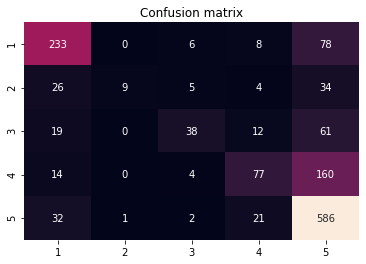

In [240]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(data=confusion_matrix(y_test_tfidf, best_model.predict(X_test_tfidf)), annot=True, fmt="d", cbar=False, xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("Confusion matrix")
plt.show()

Судя по конфужн матрице, наша модель часто путает 4 и 5 класс, а точнее для 4 предсказывает 5. 
Также он очень часто предсказывает 1 класс для всех других классов, в том числе и для 5. И, наоборот, очень часто для всех предсказывает пятый, в том числе и для 1. 
Очень редки предсказания 2 и 3 классов. 

В общем, явно прослеживается сдвинутость выборки на том, как алгоритм делает предсказание. У нас очень много объектов 1 и 5 классов и мало для остальных. Поэтому он и не учится их отличать, а в большей части при обучении видит только объекты 1 и 5 классов. Соответсвенно, их он и предсказывает сильно чаще остальных. Удивительно, что он часто путает и 1 и 5 класс, казалось бы, что в них почти всегда есть лексические элементы, само только наличие которых уже свидетельствует об общей полярности отзыва.